# 4 Pre-Processing and Training Data<a id='4_Pre-Processing_and_Training_Data'></a>

## 4.1 Contents

## 4.2 Introduction

## 4.3 Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
%matplotlib inline  

## 4.4 Load Data

In [3]:
train_features_df = pd.read_csv('../data/train_transform.csv', index_col = 0)
train_features_df.head()

,ttf_avg,rol50_mean,rol50_std,rol50_kurt,rol50_skew,rol500_mean,rol500_std,rol500_kurt,rol500_skew,rol5000_mean,...,rol50_kurt_std,rol50_skew_std,rol500_mean_std,rol500_std_std,rol500_kurt_std,rol500_skew_std,rol5000_mean_std,rol5000_std_std,rol5000_kurt_std,rol5000_skew_std
segid,,,,,,,,,,,,,,,,,,,,,
0,1.450068,4.883969,4.011743,-0.156991,0.004550,4.883703,4.182270,0.265295,0.012660,4.878336,...,0.652158,0.346816,0.319750,2.921025,0.996212,0.151200,0.255034,1.843935,3.730661,0.114367
1,1.411231,4.725729,4.379248,-0.161736,0.000775,4.725036,4.653421,0.323517,0.003476,4.719766,...,0.661855,0.350482,0.267451,4.679252,1.582485,0.172886,0.156929,3.623803,10.152144,0.197911
2,1.371918,4.906072,4.849219,-0.181254,0.009331,4.906022,5.178792,0.442928,0.010369,4.903244,...,0.657703,0.354904,0.302262,4.675530,1.629785,0.202561,0.215991,3.150538,6.937049,0.215304
3,1.332830,4.902059,4.475839,-0.173827,0.008608,4.901518,4.743548,0.343317,0.018004,4.898163,...,0.637633,0.350960,0.302469,5.054542,1.427065,0.197032,0.207615,4.086200,7.301352,0.249382
4,1.294127,4.908958,4.700727,-0.169326,0.012172,4.909695,4.950485,0.316810,0.012939,4.909758,...,0.639038,0.357612,0.270428,5.380926,1.471680,0.192242,0.157056,4.308565,8.089903,0.240521


## 4.5 Train/Test Split

In [4]:
y = train_features_df["ttf_avg"].values
X = train_features_df.drop(columns = "ttf_avg").values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=47)

In [5]:
print(X_train.shape, X_test.shape)

((3343, 24), (836, 24))

In [7]:
print(y_train.shape, y_test.shape)

(3343,) (836,)


## 4.6 Auto ML using Pycaret

In [4]:
# init setup
from pycaret.regression import *
s = setup(train_features_df, target = 'ttf_avg')

,Description,Value
0,session_id,4859
1,Target,ttf_avg
2,Original Data,"(4179, 25)"
3,Missing Values,False
4,Numeric Features,24
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2925, 18)"


In [5]:
# model training and selection
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1215,7.3323,2.7045,0.4523,0.5150,2.5444,1.1950
et,Extra Trees Regressor,2.1451,7.4777,2.7299,0.4420,0.5213,2.6145,1.6200
rf,Random Forest Regressor,2.1386,7.4809,2.7301,0.4417,0.5210,2.5831,2.5630
br,Bayesian Ridge,2.1867,7.6553,2.7624,0.4286,0.5346,2.6762,0.0170
lr,Linear Regression,2.1827,7.6602,2.7631,0.4282,0.5344,2.6947,0.9260
lightgbm,Light Gradient Boosting Machine,2.1660,7.7784,2.7838,0.4194,0.5240,2.5682,0.4710
ridge,Ridge Regression,2.2205,7.8403,2.7953,0.4151,0.5410,2.6570,0.0200
omp,Orthogonal Matching Pursuit,2.2206,7.9171,2.8091,0.4090,0.5434,2.7449,0.0140
huber,Huber Regressor,2.2304,8.3800,2.8848,0.3758,0.5439,2.6368,0.0900
ada,AdaBoost Regressor,2.4027,8.4910,2.9116,0.3649,0.5835,2.7131,0.4000


In [7]:
# analyze best model
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# predict on new data
# predictions = predict_model(best, data = test)

In [ ]:
# save best pipeline
# save_model(best,'my_best_pipeline')

## 4.7 Dummy Regressor

### 4.7.1 Initial Not-Even-A-Model<a id='4.7_Initial_Not-Even-A-Model'></a>

A good place to start is to see how good the mean is as a predictor. In other words, what if you simply say your best guess is the average price?

In [8]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

5.680453259308997

`sklearn`'s `DummyRegressor` easily does this:

In [9]:
#Fit the dummy regressor on the training data
#Hint, call its `.fit()` method with `X_train` and `y_train` as arguments
#Then print the object's `constant_` attribute and verify it's the same as the mean above
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[5.68045326]])

In [10]:
y_tr_pred = train_mean * np.ones(len(y_train))
y_te_pred = train_mean * np.ones(len(y_test))

### 4.7.2 R-squared<a id='4.7.2.0.1_R-squared'></a>

In [17]:
print("train R2 = %5.3f and test R2 = %5.3f" % (r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)))

train R2 = 0.000 and test R2 = -0.000


### 4.7.3 Mean absolute error<a id='4.7.2.0.2_Mean_absolute_error'></a>

In [18]:
print("MAEs of train and test are %5.3f and %5.3f" %(mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)))

MAEs of train and  test are 3.050 and 2.995


### 4.7.4 Root mean squared error<a id='4.7.2.0.3_Mean_squared_error'></a>

In [19]:
print("RMSEs of train and test are %5.3f and %5.3f" % (mean_squared_error(y_train, y_tr_pred).sqrt(), mean_squared_error(y_test, y_te_pred).sqrt()))

MSEs of train and test are 13.487 and 13.144


## 4.8 Linear Models

### 4.8.1 Linear Regression

In [20]:
LR_pipe = make_pipeline(
    StandardScaler(), 
    SelectKBest(f_regression),
    LinearRegression()
)

In [21]:
#Call the pipe's `fit()` method with `X_train` and `y_train` as arguments
LR_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x000002DFD01CE160>)),
                ('linearregression', LinearRegression())])

#### 4.8.1.1 Make predictions on the train and test sets<a id='4.8.2.3_Make_predictions_on_the_train_and_test_sets'></a>

In [22]:
y_tr_pred = LR_pipe.predict(X_train)
y_te_pred = LR_pipe.predict(X_test)

#### 4.8.1.2 Assess performance<a id='4.8.2.4_Assess_performance'></a>

In [24]:
print("R2 of train and test are %5.3f and %5.3f" % (r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)))

R2 of train and test are 0.432 and 0.450


In [27]:
print("MAEs of train and test are %5.3f and %5.3f" %(mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)))

MAEs of train and test are 2.163 and 2.119


In [29]:
print("RMSEs of train and test are %5.3f and %5.3f" % (np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))))

RMSEs of train and test are 2.768 and 2.690


### 4.8.2 Define a new pipeline to select a different number of features

In [31]:
k = [k+1 for k in range(X_train.shape[1])]
grid_params = {'selectkbest__k': k}

In [32]:
lr_grid_cv = GridSearchCV(LR_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [33]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x000002DFD01CE160>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24]})

In [34]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [35]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 13}

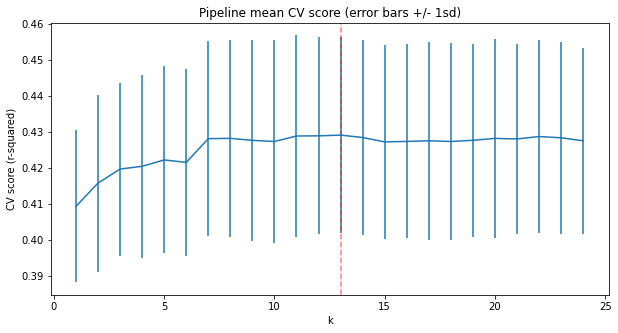

In [36]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [37]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()


In [38]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = train_features_df.drop(columns = "ttf_avg").columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

rol50_std_std       8.757827
rol500_std          5.724139
rol50_kurt          2.531846
rol500_kurt_std     0.457019
rol500_skew_std     0.233943
rol5000_std         0.147178
rol5000_kurt        0.027073
rol5000_skew_std    0.000036
rol50_kurt_std     -0.088565
rol50_skew_std     -0.295729
rol500_kurt        -1.098162
rol50_std          -4.194237
rol500_std_std     -9.749545
dtype: float64

## 4.9 Ensemble methods

### 4.9.1 Random Forest Regression

#### 4.9.1.1 Define the pipeline<a id='4.10.1_Define_the_pipeline'></a>

In [39]:
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

#### 4.9.1.2 Fit and assess performance using cross-validation<a id='4.10.2_Fit_and_assess_performance_using_cross-validation'></a>

In [40]:
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [41]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.43740624, 0.40543095, 0.47560118, 0.46472576, 0.44121179])

In [42]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.4448751821152014, 0.02434413803649507)

### 4.9.2 Gradient Boosting Regression

#### 4.9.2.1 Define the pipeline

In [43]:
GB_pipe = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor(random_state=47)
)

#### 4.9.2.2 Fit and assess performance using cross-validation<a id='4.10.2_Fit_and_assess_performance_using_cross-validation'></a>

In [44]:
gb_default_cv_results = cross_validate(GB_pipe, X_train, y_train, cv=5)

In [45]:
gb_cv_scores = gb_default_cv_results['test_score']
gb_cv_scores

array([0.42326037, 0.39957159, 0.47535086, 0.44176555, 0.46000774])

In [46]:
np.mean(gb_cv_scores), np.std(gb_cv_scores)

(0.4399912209828273, 0.026712472996304797)

In [49]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 47)
    gb_pipe = make_pipeline(    StandardScaler(),    gb)
    gb_pipe.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    gb_cv_scores = gb_default_cv_results['test_score']
    print("R2 (training): {0:.3f}".format(np.mean(gb_cv_scores)))
    print("std of R2 (training): {0:.3f}".format(np.std(gb_cv_scores)))

Learning rate:  0.05
R2 (training): 0.440
std of R2 (training): 0.027
Learning rate:  0.1
R2 (training): 0.440
std of R2 (training): 0.027
Learning rate:  0.25
R2 (training): 0.440
std of R2 (training): 0.027
Learning rate:  0.5
R2 (training): 0.440
std of R2 (training): 0.027
Learning rate:  0.75
R2 (training): 0.440
std of R2 (training): 0.027
Learning rate:  1
R2 (training): 0.440
std of R2 (training): 0.027
